<a href="https://colab.research.google.com/github/mvince33/Coding-Challenges/blob/main/week08/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The famous Kaggle Titance machine learning competition

## Imports

In [35]:
import pandas as pd

## Load the data

In [36]:
# Kaggle splits the data into training and test sets.
train_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQmV95zo_tq3ZDwm38K551MkeT12FH82lySdVXt2cFOmYtVgAaZOqFY2xxCREwIuM8OyB8JCo3UgqJE/pub?output=csv'
df_train = pd.read_csv(train_url)
test_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQLHlapKdl0n9_oxFD5LZNWsqU633NLqbFxbjsmEA3BvYd0kV76n6ycn_8o9hbef34B8wmXvpv7pnJG/pub?output=csv'
df_test = pd.read_csv(test_url)
display(df_train.head())
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data exploration

### Check for duplicates

In [37]:
# Check for duplicates
print('Duplicates:', df_train.duplicated().sum())

Duplicates: 0


### Select features

In [38]:
# Make a list of columns to drop. These will be features
# that we don't expect to be predictive of whether someone
# survived the Titanic.
drop_cols = ['Name',
             'Ticket',
             'Embarked',
             'Cabin']

In [39]:
# Drop the features from the test and training data
df_train.drop(columns = drop_cols, inplace = True)
df_test.drop(columns = drop_cols, inplace = True)

# Make sure the columns were dropped
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch     

### Check for missing values

In [40]:
# Check for missing values
print('Missing Values:', df_train.isna().sum().sum())

Missing Values: 177


In [41]:
# Explore the missing values more carefully
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [45]:
# Get the descriptive stats of the age column
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

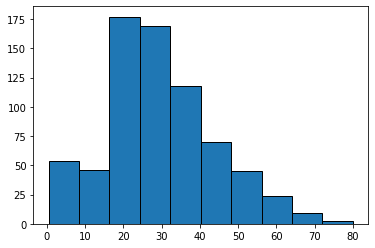

In [48]:
# Get a histogram of the age column
df_train['Age'].hist(grid = False,
                     edgecolor = 'k')

> The data seems to skew right so we will impute the missing ages with the median.

In [42]:
# Get for info about the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB
